In [1]:
from tensorflow.keras.applications import ResNet50

# Create an instance of the ResNet50 model
model = ResNet50(weights='imagenet')

# Optional: Print a summary of the model architecture
model.summary()

2023-06-06 13:12:16.827708: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-06 13:12:17.189967: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-06 13:12:17.191756: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 13:12:18.726372: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [2]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from plot_keras_history import show_history, plot_history
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Specify the directory containing the images
data_dir = "/mnt/e/Lewagon_Project/dummy"


In [4]:
# Create a TensorFlow dataset from the directory
ds_training = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=29,
    validation_split=0.5,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)
ds_test = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=29,
    validation_split=0.5,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)



left_ds, right_ds = tf.keras.utils.split_dataset(ds_training, left_size=0.5)

Found 2372 files belonging to 4 classes.
Using 1186 files for training.
Found 2372 files belonging to 4 classes.
Using 1186 files for validation.


2023-06-06 13:12:29.537971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1186]
	 [[{{node Placeholder/_4}}]]
2023-06-06 13:12:29.538328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1186]
	 [[{{node Placeholder/_4}}]]


In [5]:
#adding the last layers
def set_nontrainable_layers(model):
    
    # Set the first layers to be untrainable
    model.trainable = False

    return model

es = EarlyStopping()

model = set_nontrainable_layers(model)
flattening_layer = layers.Flatten()
dense_layer = layers.Dense(1000, activation='relu')
dropout = layers.Dropout(0.5)
prediction_layer = layers.Dense(4, activation='sigmoid')

model = tf.keras.Sequential([
  model,
  flattening_layer,
  dense_layer,
  dropout,
  prediction_layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 26,641,716
Trainable params: 1,005,004
Non-trainable params: 25,636,712
_________________________________________________________________


In [6]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics = 'accuracy')

# Train the model
history = model.fit(ds_training,validation_data = right_ds, epochs = 20,callbacks = [es])
# Evaluate the model
results = model.evaluate(left_ds)

print("Evaluation results:")
for metric_name, result in zip(model.metrics_names, results):
    print(f"{metric_name}: {result}")

Epoch 1/20


2023-06-06 13:12:32.238285: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1186]
	 [[{{node Placeholder/_4}}]]
2023-06-06 13:12:32.238559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1186]
	 [[{{node Placeholder/_4}}]]


38/38 [==============================] - ETA: 0s - loss: 1.0918 - accuracy: 0.8019

2023-06-06 13:13:15.649908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [593]
	 [[{{node Placeholder/_1}}]]


38/38 [==============================] - 64s 2s/step - loss: 1.0918 - accuracy: 0.8019 - val_loss: 0.7575 - val_accuracy: 0.8786
Epoch 2/20
38/38 [==============================] - 60s 2s/step - loss: 0.5236 - accuracy: 0.9300 - val_loss: 0.3439 - val_accuracy: 0.9444
Epoch 3/20
38/38 [==============================] - 61s 2s/step - loss: 0.2707 - accuracy: 0.9435 - val_loss: 0.2189 - val_accuracy: 0.9477
Epoch 4/20
38/38 [==============================] - 58s 2s/step - loss: 0.1952 - accuracy: 0.9553 - val_loss: 0.1723 - val_accuracy: 0.9494
Epoch 5/20
38/38 [==============================] - 59s 2s/step - loss: 0.1590 - accuracy: 0.9578 - val_loss: 0.1466 - val_accuracy: 0.9595
Epoch 6/20
38/38 [==============================] - 58s 2s/step - loss: 0.1389 - accuracy: 0.9612 - val_loss: 0.1285 - val_accuracy: 0.9612
Epoch 7/20
38/38 [==============================] - 58s 2s/step - loss: 0.1239 - accuracy: 0.9671 - val_loss: 0.1156 - val_accuracy: 0.9696
Epoch 8/20
38/38 [=============

2023-06-06 13:32:26.673958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [593]
	 [[{{node Placeholder/_1}}]]


19/19 [==============================] - 20s 1s/step - loss: 0.0604 - accuracy: 0.9848
Evaluation results:
loss: 0.06038286164402962
accuracy: 0.9848229289054871


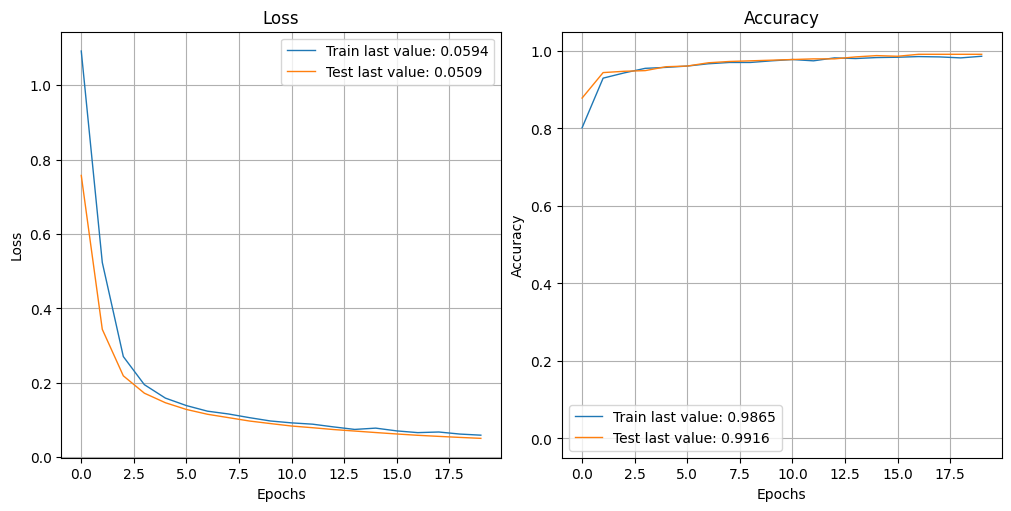

In [7]:
show_history(history)
plot_history(history, path="interpolated.png")
plt.close()

array([[9.8672545e-01, 1.3427128e-03, 1.4030997e-01, 1.5057679e-01],
       [9.9159902e-01, 1.1802983e-03, 4.2199004e-02, 2.4119253e-01],
       [4.7357570e-04, 3.5482682e-03, 4.3740088e-01, 9.9691188e-01],
       ...,
       [9.9703318e-01, 9.1199361e-04, 3.2309718e-02, 1.2823211e-01],
       [4.1450611e-01, 5.6671602e-01, 3.4428291e-02, 1.5859187e-01],
       [1.8582767e-01, 8.5782056e-04, 9.9748445e-01, 1.3542382e-02]],
      dtype=float32)

1/1 [==============================] - 0s 137ms/step


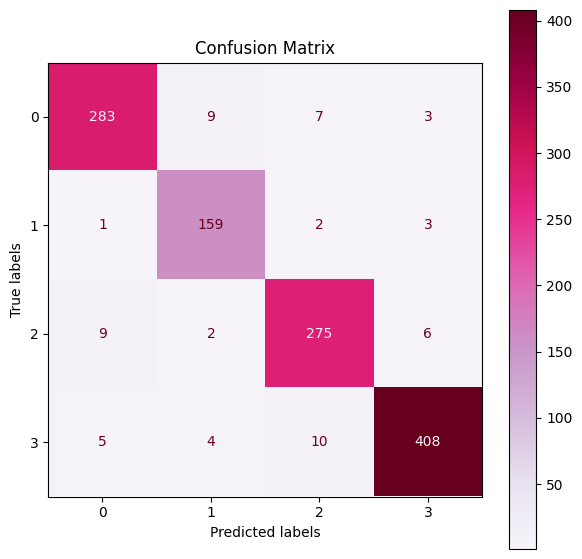

In [12]:
y_pred=model.predict(left_ds)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = []
labels = []

for x, y in ds_test:
    output = model.predict(x)
    output = tf.argmax(output, axis=1).numpy()
    predictions.extend(output)
    labels.extend(np.array(y).tolist())

predictions = np.array(predictions)
labels = np.array(labels)

disp = confusion_matrix(labels, predictions)
display_labels = np.unique(labels)

cm_display = ConfusionMatrixDisplay(confusion_matrix=disp, display_labels=display_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
cm_display.plot(cmap="PuRd", ax=ax)

# Customize the axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()



In [17]:
model.save('/mnt/e/Lewagon_Project/dummy/model.tf')


2023-06-06 20:17:55.673240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1000]
	 [[{{node inputs}}]]
2023-06-06 20:17:59.211119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1000]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /mnt/e/Lewagon_Project/dummy/rice_model.tf/assets


INFO:tensorflow:Assets written to: /mnt/e/Lewagon_Project/dummy/rice_model.tf/assets
